# Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
import time
start=time.time()

In [2]:
df=pd.read_csv("bank-additional-full.csv",sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
numeric_columns=list(df._get_numeric_data().columns) #set of all numerical columns
categorical_columns=list(set(df.columns)-set(numeric_columns)-set('y')) #set of all categorical Columns

In [4]:
X=df.iloc[:,0:20]
Y=df.iloc[:,20:21]

# spliting Training and Testing Set

Since the data is highly imbalanced(the number of 'yes' is much less than than 'no'), so we have to use randomoversampler. so that we can add more number of 'yes' in the training set. 
samling_strategy =0.5 means no. of minority target varible sample('yes') would be 0.5 times of no. of majority target varibale samples('no')

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=10)
ros = RandomOverSampler(sampling_strategy=0.5,random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train)
df_train=pd.concat([X_resampled,Y_resampled],axis=1)
df_test=pd.concat([X_test,Y_test],axis=1)

In [6]:
unknowns=[]
for x in categorical_columns:
    if 'unknown' in list(df[x]):
        unknowns.append(x)
unknowns   

['loan', 'education', 'job', 'default', 'housing', 'marital']

In [7]:
for x in unknowns:
    count=df_train[x].value_counts()
    df_train.loc[df_train[x] == "unknown",x] = count.idxmax()
    df_test.loc[df_test[x] == "unknown",x] =count.idxmax()

In [8]:
ordered_features = ['education', 'housing', 'loan', 'contact','month', 'day_of_week','poutcome']
for x in ordered_features:
    dict={x:set(df_train[x])}
    print(dict)
    dict={}

{'education': {'basic.9y', 'high.school', 'basic.6y', 'basic.4y', 'university.degree', 'illiterate', 'professional.course'}}
{'housing': {'yes', 'no'}}
{'loan': {'yes', 'no'}}
{'contact': {'telephone', 'cellular'}}
{'month': {'nov', 'sep', 'oct', 'may', 'aug', 'mar', 'apr', 'jun', 'jul', 'dec'}}
{'day_of_week': {'tue', 'wed', 'mon', 'fri', 'thu'}}
{'poutcome': {'nonexistent', 'success', 'failure'}}


# Labeling Ordered Features

This features are already ordered so we have just labeled the data manually by label encoder

In [9]:
label_ordered_features={'education':{'illiterate':0, 'basic.4y':4,'basic.6y':6,'basic.9y':9,'high.school':10,'professional.course':11,'university.degree':12},
                       'housing':{'yes':1,'no':0},
                       'loan':{'yes':1,'no':0},
                       'contact':{'telephone':0,'cellular':1},
                       'month':{'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},
                       'day_of_week':{'mon':1,'tue':2,'wed':3,'thu':4,'fri':5},
                       'poutcome':{'nonexistent':0,'success':1,'failure':2}}

In [10]:
for x in ordered_features:
    df_train = df_train.replace({x:label_ordered_features[x]})
    df_test = df_test.replace({x:label_ordered_features[x]}) 

# One Hot Encoding For Unordered Categorical Variable

for Unordered features we have used the one hot encoder  

In [11]:
unordered_variables=['job','marital']

In [12]:
for x in unordered_variables:
        label_encoder = LabelEncoder()
        label_encoder.fit(df_train[x])
        df_train[x] = label_encoder.transform(df_train[x])
        df_test[x] = label_encoder.transform(df_test[x])

In [13]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(df_train[unordered_variables])
one_hot_encoded_array_train = one_hot_encoder.transform(df_train[unordered_variables])
one_hot_encoded_df_train = pd.DataFrame(one_hot_encoded_array_train, index=df_train.index)
one_hot_encoded_array_test = one_hot_encoder.transform(df_test[unordered_variables])
one_hot_encoded_df_test = pd.DataFrame(one_hot_encoded_array_test, index=df_test.index)

In [14]:
df_train = pd.concat([df_train,one_hot_encoded_df_train], axis=1) 
df_test = pd.concat([df_test,one_hot_encoded_df_test], axis=1)

# Normalization of Numerical Variable

Normalization for continuous variable

In [15]:
numerical_variable = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [16]:
normalizer=MinMaxScaler()
normalizer.fit(df_train[numerical_variable])
df_train[numerical_variable]=normalizer.transform(df_train[numerical_variable])
df_test[numerical_variable]=normalizer.transform(df_test[numerical_variable])

# Final Training and Testing Set

In [17]:
df_train=df_train.drop(['pdays','default'],axis=1)
df_test=df_test.drop(['pdays','default'],axis=1)

In [18]:
Y_train1=df_train.iloc[:,18:19]
X_train1=df_train.drop(['y'],axis=1)
Y_test1=df_test['y']
X_test1=df_test.drop(['y'],axis=1)

In [19]:
X_train1

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,4,5,6,7,8,9,10,11,12,13
0,0.419753,9,1,6,1,1,0,5,5,168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.407407,1,1,9,1,0,0,5,4,135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.148148,6,2,11,1,0,1,5,3,774,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.308642,7,1,12,1,0,1,4,1,17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.098765,9,2,11,1,0,1,7,1,292,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43852,0.481481,2,1,12,0,0,1,4,4,457,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43853,0.160494,8,2,10,0,0,0,6,3,1242,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
43854,0.234568,4,0,12,1,0,1,6,1,422,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43855,0.086420,0,2,11,1,0,1,4,1,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
Y_train1

,y
0,no
1,no
2,yes
3,no
4,no
...,...
43852,yes
43853,yes
43854,yes
43855,yes


# Fitting the Data into Random Forest Classifier

In [21]:
randomforest=RandomForestClassifier(n_estimators = 150, random_state = 42, max_depth = 15)

In [22]:
%load_ext memory_profiler
from memory_profiler import profile
%memit randomforest.fit(X_train1,Y_train1) 

C:\Users\ritir\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
<string>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


peak memory: 267.95 MiB, increment: 47.62 MiB


In [23]:
Y_pred=randomforest.predict(X_test1)

C:\Users\ritir\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [24]:
new=pd.DataFrame()
new['test']=Y_test1
new['pred']=Y_pred

In [25]:
new

,test,pred
29773,no,no
14070,no,yes
39364,yes,no
29279,no,no
11888,no,no
...,...,...
29225,yes,yes
37798,yes,yes
25228,no,no
23709,no,no


# Performance Metrics

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score =accuracy_score(Y_test1, Y_pred)
print('Accuracy of the model=',accuracy_score*100,'%')

Accuracy of the model= 90.50740470988103 %


In [27]:
#from sklearn.metrics import precision_score
#precision=precision_score(Y_test1, Y_pred, pos_label='yes')
#print('Precision of the model=',precision*100,'%')

In [28]:
from sklearn.metrics import f1_score
F1_score=f1_score(Y_test1, Y_pred,average='weighted')
print('F1 score is=',F1_score*100,'%')

F1 score is= 91.00792048976062 %


In [29]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(Y_test1,Y_pred, labels=['no','yes'])
con_matrix

array([[6788,  522],
       [ 260,  668]], dtype=int64)

C:\Users\ritir\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ritir\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


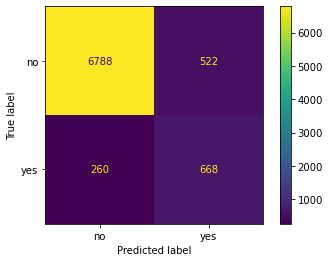

In [30]:
from sklearn.metrics import plot_confusion_matrix

fig = plt.figure()
plot_confusion_matrix(randomforest,X_test1,Y_test1,display_labels=['no','yes'])
plt.savefig("random_forest_confusion_matrix")
plt.close(fig)

In [31]:
end=time.time()
print(end-start,'second')

5.0578906536102295 second
